1.RNN Sentiment Analysis - Movie Review

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

df = pd.read_csv(f"{path}/IMDB Dataset.csv")

reviews = df['review'].tolist()
labels = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).tolist()   # Load corresponding labels (0 for negative, 1 for positive)

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
padded_sequences = pad_sequences(sequences, maxlen=200)

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)

X_train = tf.convert_to_tensor(X_train, dtype=tf.int32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.int32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    SimpleRNN(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

100%|██████████| 25.7M/25.7M [00:02<00:00, 12.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.6558 - loss: 0.6026 - val_accuracy: 0.6382 - val_loss: 0.6240
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7248 - loss: 0.5413 - val_accuracy: 0.7503 - val_loss: 0.5200
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7983 - loss: 0.4393 - val_accuracy: 0.7916 - val_loss: 0.4708
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8464 - loss: 0.3569 - val_accuracy: 0.7916 - val_loss: 0.4823
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8826 - loss: 0.2906 - val_accuracy: 0.7940 - val_loss: 0.4701
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8210 - loss: 0.3926 - val_accuracy: 0.8056 - val_loss: 0.4524
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8398 - loss: 0.3756 - val_accuracy: 0.7869 - val_loss: 0.4901
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8382 - loss: 0.36

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7782 - loss: 0.5490
Test Accuracy: 78.13%


In [ ]:
new_review = ["This movie was fantastic! I loved every minute of it."]
new_sequence = tokenizer.texts_to_sequences(new_review)
new_padded = pad_sequences(new_sequence, maxlen=200)
prediction = model.predict(new_padded)
print("Positive" if prediction > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Positive


2.Different types of autoencoders using Fashion MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Lambda
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)  # Add channel dimension
x_test = np.expand_dims(x_test, -1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Vanilla Autoencoder

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0560 - val_loss: 0.0174
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0153 - val_loss: 0.0115
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0069 - val_loss: 0.0068
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0064 - val_loss: 0.0063
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


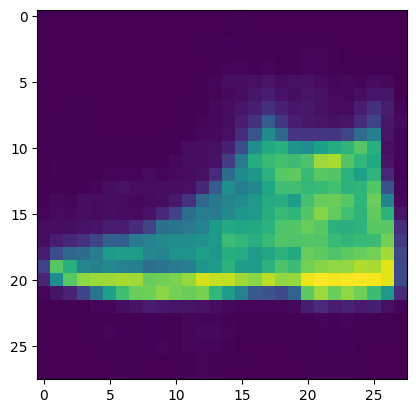

In [ ]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)

decoded = Dense(784, activation='sigmoid')(encoded)
decoded = Reshape((28, 28, 1))(decoded)

autoencoder1 = Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='mse')

autoencoder1.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

decoded_imgs = autoencoder1.predict(x_test)
plt.imshow(np.squeeze(decoded_imgs[0]))


Denoising Autoencoder

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0364 - val_loss: 0.0187
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0180 - val_loss: 0.0173
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0162 - val_loss: 0.0160
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0159 - val_loss: 0.0157
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0156 - val_loss: 0.0156
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0154 - val_loss: 0.0154
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0150 - val_loss: 0.0151
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


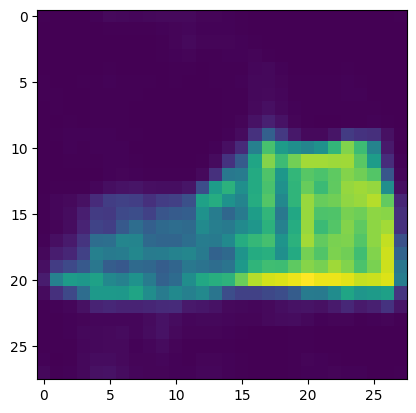

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, validation_data=(x_test_noisy, x_test))

decoded_imgs = autoencoder.predict(x_test_noisy)
plt.imshow(np.squeeze(decoded_imgs[0]))


Convolutional Encoder

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0588 - val_loss: 0.0138
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0129 - val_loss: 0.0116
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0101 - val_loss: 0.0097
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0090 - val_loss: 0.0087
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0077 - val_loss: 0.0076
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


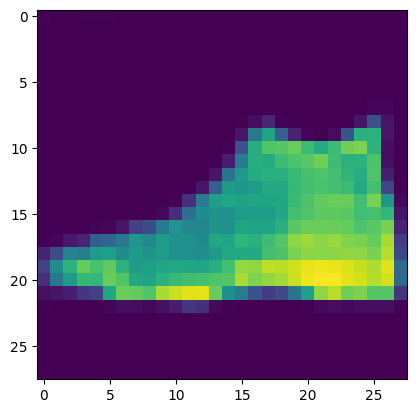

In [ ]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='mse')

autoencoder2.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

decoded_imgs = autoencoder2.predict(x_test)
plt.imshow(np.squeeze(decoded_imgs[0]))


In [ ]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_csv(f"{path}/creditcard.csv")
X = df.drop('Class', axis=1)
X = StandardScaler().fit_transform(X)
X_train, X_test = train_test_split(X, test_size=0.2)

input_dim = X_train.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(X_train, X_train, epochs=20, batch_size=128, validation_data=(X_test, X_test))

reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
threshold = np.quantile(mse, 0.99)
anomalies = mse > threshold
print("Number of anomalies:", np.sum(anomalies))

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Epoch 1/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.8142 - val_loss: 0.5081
Epoch 2/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4896 - val_loss: 0.4918
Epoch 3/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4877 - val_loss: 0.4920
Epoch 4/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4785 - val_loss: 0.4924
Epoch 5/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4766 - val_loss: 0.4928
Epoch 6/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4799 - val_loss: 0.4935
Epoch 7/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4824 - val_loss: 0.4945
Epoch 8/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4743 - val_loss: 0.4946
Epoch 9/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4773 - val_loss: 0.4953
Epoch 10/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4787 - val_loss: 0.4959
Epoch 11/20
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms

3.MLP for Classification

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

input_size = 784
hidden_size = 128
num_classes = 10
model = MLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%')
    print("Predicted labels:", predicted[:10])
    print("True labels:     ", labels[:10])


Epoch [1/5], Loss: 0.1353
Epoch [2/5], Loss: 0.1445
Epoch [3/5], Loss: 0.1621
Epoch [4/5], Loss: 0.0698
Epoch [5/5], Loss: 0.1783
Test Accuracy: 96.59%
Predicted labels: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
True labels:      tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
